<a href="https://colab.research.google.com/github/NanThanThanSoe/DIP_ImageEnhancement/blob/master/DIP_Workshop2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digital Image Processing - Workshop 2 (21 April 2020)
- By Nan Than Than Soe

In [0]:
# import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from math import sqrt,exp

from PIL import Image
import urllib.request
import io
import scipy
from scipy.fftpack import fft2, ifft2
from numpy import r_
from numpy import pi
from numpy import zeros

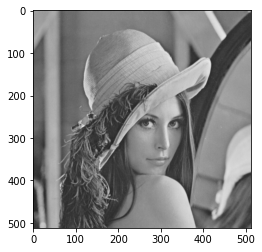

In [2]:
origin = cv2.imread("/content/drive/My Drive/lena_gray.bmp")
plt.imshow(origin)

In [3]:
print(origin.shape, origin.size)

(512, 512, 3) 786432


(512, 512) 262144


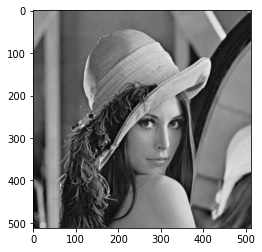

In [4]:
# convert image to gray-scale
image = cv2.imread("/content/drive/My Drive/lena_gray.bmp", 0)
print(image.shape, image.size)
plt.imshow(image, 'gray')

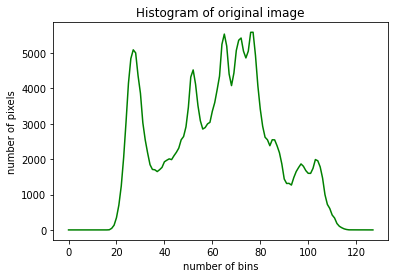

In [5]:
 ## CALLING OPNECV INBUILT HISTOGRAM FUNCTION
cv2_hist = cv2.calcHist([image],[0],None,[128],[0,256])
 
## PLOTTING BOTH HISTOGRAM FOR VERIFICATION
plt.title("Histogram of original image")
plt.xlabel("number of bins")
plt.ylabel("number of pixels")
plt.plot(cv2_hist,'g') 
plt.show()

2D DFT

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d6829e80>,
 Text(0.5, 1.0, 'Phase only image'))

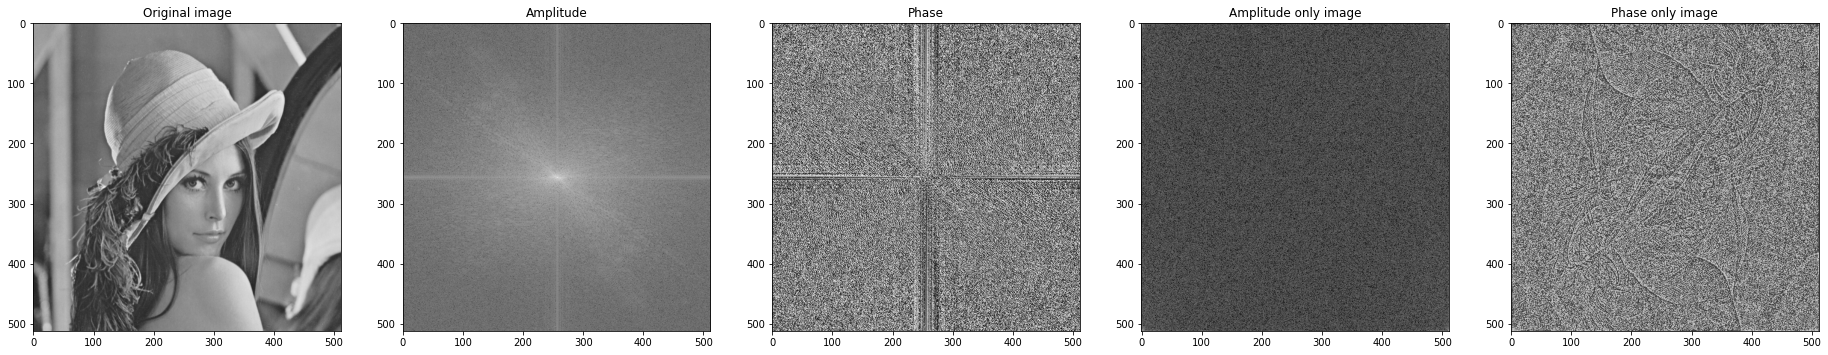

In [6]:
# 2DFT by using numpy
# amplitude and phase
im = np.fft.fft2(image)
im1 = np.fft.fftshift(im)
image_amp = np.log(np.abs(im1))
image_phase = np.angle(im1)


# Amplitude only image
im2 = np.fft.ifftshift(image_amp)
imap1 = np.fft.ifft2(im2)
imap = np.abs(10+np.log(imap1))

# phase only image
im3 = np.fft.ifftshift(image_phase)
imp1 = np.fft.ifft2(im3)
imp = np.angle(imp1)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(origin,cmap='gray'), plt.title( "Original image")
plt.subplot(152),plt.imshow(image_amp,cmap='gray'), plt.title( "Amplitude")
plt.subplot(153),plt.imshow(image_phase,cmap='gray'), plt.title( "Phase")
plt.subplot(154),plt.imshow(imap,cmap='gray'), plt.title( "Amplitude only image")
plt.subplot(155),plt.imshow(imp,cmap='gray'), plt.title( "Phase only image")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d66c2cc0>,
 Text(0.5, 1.0, 'Phase angle'))

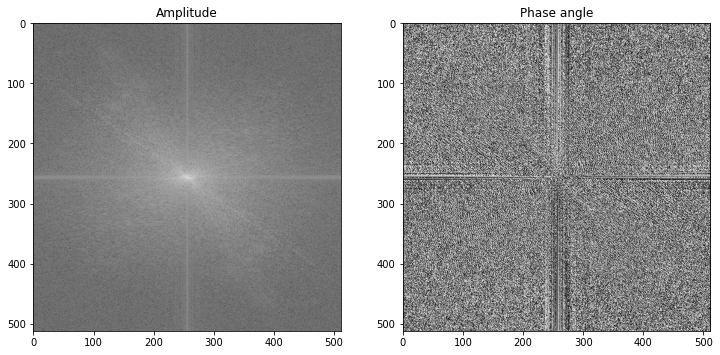

In [7]:
# 2DFT spectrum and phase angle
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(image_amp, "gray"), plt.title("Amplitude")
plt.subplot(152), plt.imshow(image_phase, "gray"), plt.title("Phase angle")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d65fe2e8>,
 Text(0.5, 1.0, '2DFT Image block'))

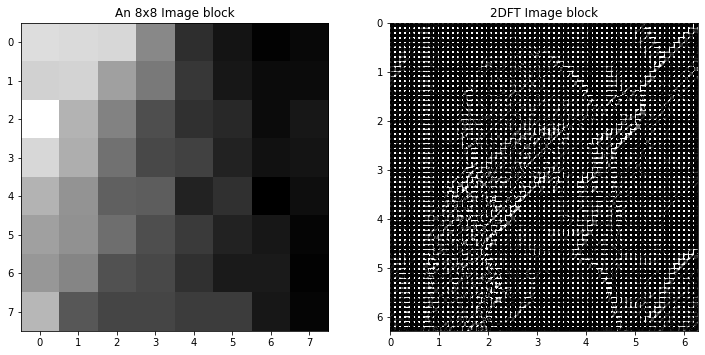

In [8]:
imsize2 = image.shape
dft2 = np.zeros(imsize2)
pos = 128

# 8x8 DFT
for i in r_[:imsize2[0]:8]:
    for j in r_[:imsize2[1]:8]:
        dft2[i:(i+8),j:(j+8)] = np.fft.fft2( image[i:(i+8),j:(j+8)] )

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image[pos:pos+8,pos:pos+8],cmap='gray'), plt.title( "An 8x8 Image block")
plt.subplot(152),plt.imshow(dft2, cmap='gray',vmax= np.max(abs(dft2))*0.01,vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("2DFT Image block")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d659dac8>,
 Text(0.5, 1.0, '2DFT Image block'))

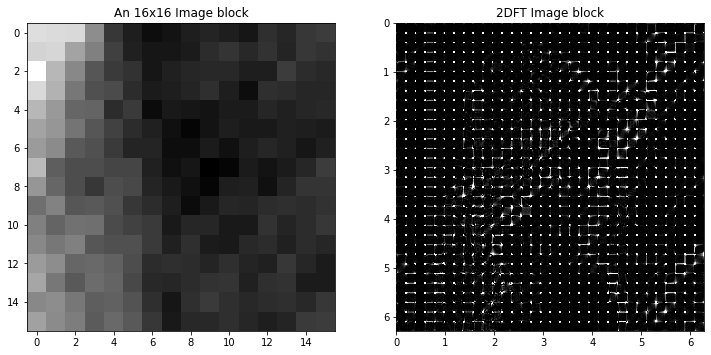

In [9]:
imsize2 = image.shape
dft2 = np.zeros(imsize2)
pos = 128

# 16x16 DFT
for i in r_[:imsize2[0]:16]:
    for j in r_[:imsize2[1]:16]:
        dft2[i:(i+16),j:(j+16)] = np.fft.fft2( image[i:(i+16),j:(j+16)] )

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image[pos:pos+16,pos:pos+16],cmap='gray'), plt.title( "An 16x16 Image block")
plt.subplot(152),plt.imshow(dft2, cmap='gray',vmax= np.max(abs(dft2))*0.01,vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("2DFT Image block")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d647a048>,
 Text(0.5, 1.0, '2D DFT Image'))

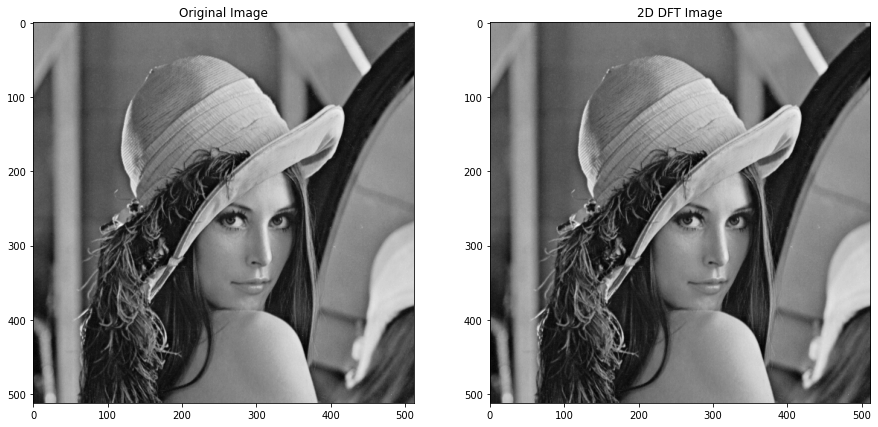

In [10]:
# decentralized image
imgdft = np.fft.ifftshift(im1)
image_decen = np.log(1+np.abs(imgdft))

# procced image
imgdft2 = np.fft.ifft2(imgdft)
procced_img = np.abs(imgdft2)

plt.figure(figsize=(15,15), constrained_layout=False)
plt.subplot(121), plt.imshow(image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(procced_img, cmap="gray"), plt.title("2D DFT Image")

In [11]:
# Calculate PSNR of 2D DFT
def compute_psnr(img1, img2):
  img1 = img1.astype(np.float64) / 255.
  img2 = img2.astype(np.float64) / 255.
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
      return "Same Image"
  return 10 * math.log10(1. / mse)

psnr_dft2=compute_psnr(image,procced_img)
print(psnr_dft2)

328.3009794948789


1D DFT

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d6360f28>,
 Text(0.5, 1.0, 'Phase only image'))

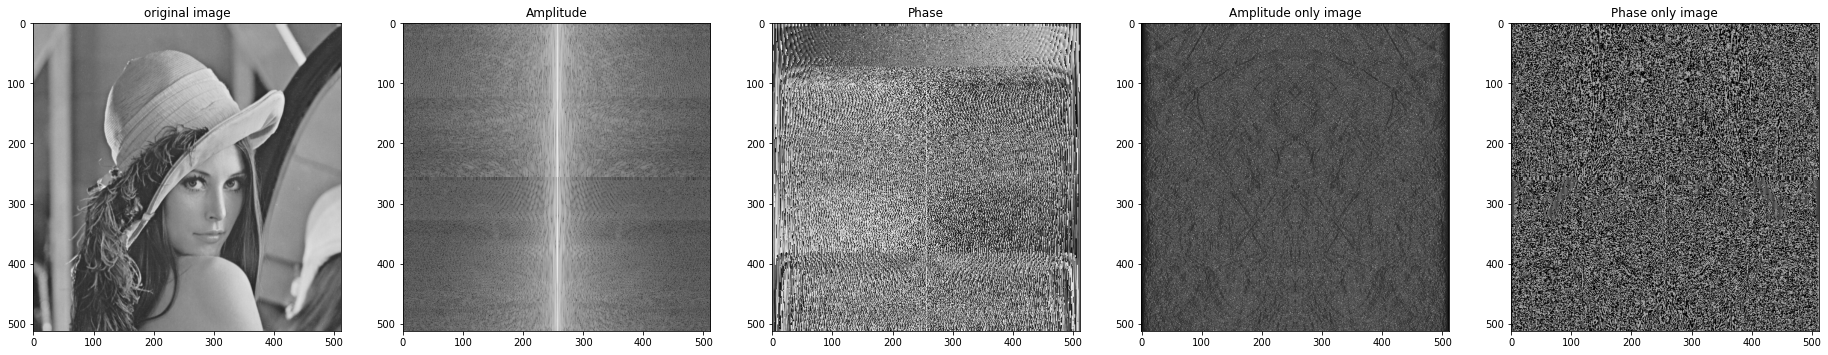

In [12]:
# 1DFT by using numpy
# amplitude and phase
img = np.fft.fft(image)
img1 = np.fft.fftshift(img)
img_amp = np.log(1+np.abs(img1))
img_phase = np.angle(img)


# Amplitude only image
img2 = np.fft.ifftshift(img_amp)
imgap1 = np.fft.ifft(img2)
imgap = np.abs(np.log(imgap1))

# phase only image
img3 = np.fft.ifftshift(img_phase)
imgp1 = np.fft.ifft(img3)
imgp = np.angle(imgp1)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(origin,cmap='gray'), plt.title( "original image")
plt.subplot(152),plt.imshow(img_amp,cmap='gray'), plt.title( "Amplitude")
plt.subplot(153),plt.imshow(img_phase,cmap='gray'), plt.title( "Phase")
plt.subplot(154),plt.imshow(imgap,cmap='gray'), plt.title( "Amplitude only image")
plt.subplot(155),plt.imshow(imgp,cmap='gray'), plt.title( "Phase only image")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe85f0147b8>,
 Text(0.5, 1.0, 'Phase angle'))

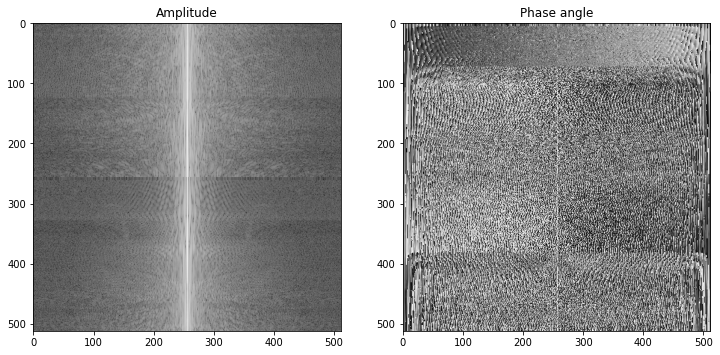

In [13]:
# 1DFT spectrum and phase angle
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_amp, "gray"), plt.title("Amplitude")
plt.subplot(152), plt.imshow(img_phase, "gray"), plt.title("Phase angle")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d61b96a0>,
 Text(0.5, 1.0, '1DFT Image block'))

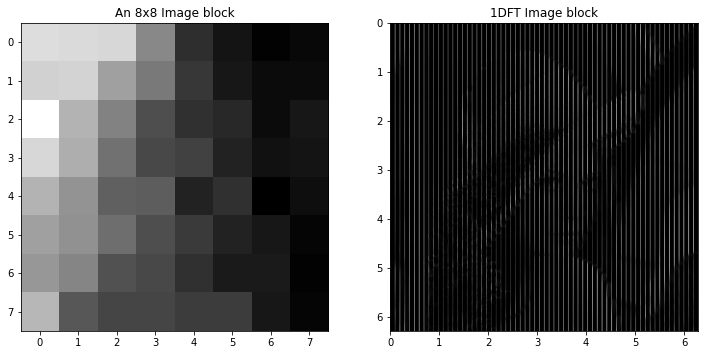

In [14]:
imsize = image.shape
dft = np.zeros(imsize)
pos = 128

# 8x8 DFT
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dft[i:(i+8),j:(j+8)] = np.fft.fft( image[i:(i+8),j:(j+8)] )

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image[pos:pos+8,pos:pos+8],cmap='gray'), plt.title( "An 8x8 Image block")
plt.subplot(152),plt.imshow(dft, cmap='gray',vmax= np.max(abs(dft)),vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("1DFT Image block")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d610dba8>,
 Text(0.5, 1.0, '1DFT Image block'))

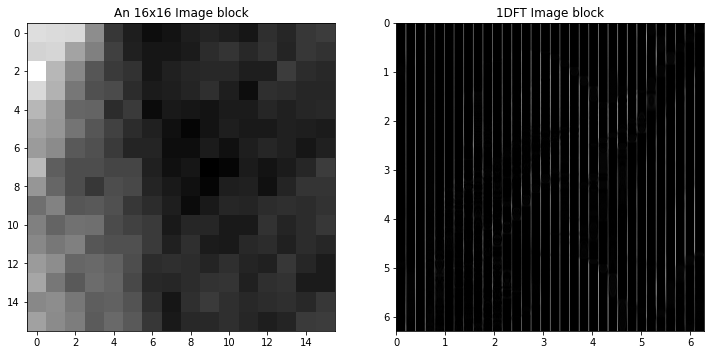

In [15]:
imsize = image.shape
dft = np.zeros(imsize)
pos = 128

# 16x16 DFT
for i in r_[:imsize[0]:16]:
    for j in r_[:imsize[1]:16]:
        dft[i:(i+16),j:(j+16)] = np.fft.fft( image[i:(i+16),j:(j+16)] )

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image[pos:pos+16,pos:pos+16],cmap='gray'), plt.title( "An 16x16 Image block")
plt.subplot(152),plt.imshow(dft, cmap='gray',vmax= np.max(abs(dft)),vmin = 0, extent=[0,2*pi,2*pi,0]), plt.title("1DFT Image block")

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d6081128>,
 Text(0.5, 1.0, '1D DFT Image'))

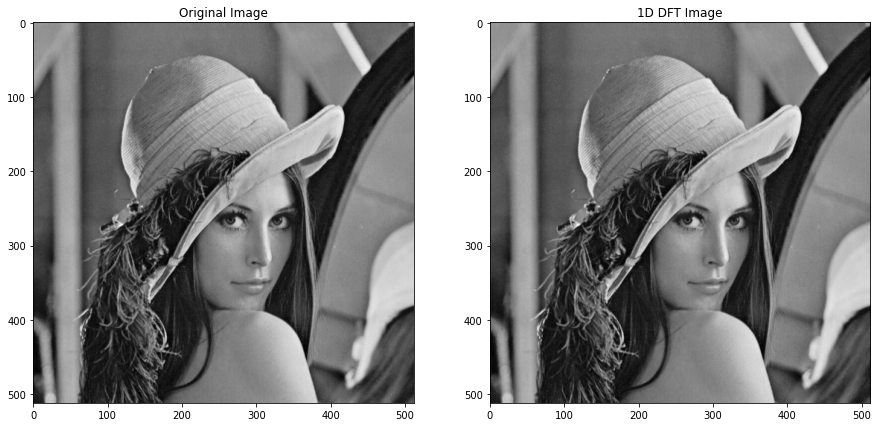

In [16]:
# decentralized image
imgdft1 = np.fft.ifftshift(img1)
image_decen1 = np.log(1+np.abs(imgdft1))

# procced image
img_dft1 = np.fft.ifft(imgdft1)
procced_img_dft1 = np.abs(img_dft1)

plt.figure(figsize=(15,15), constrained_layout=False)
plt.subplot(121), plt.imshow(image, cmap="gray"), plt.title("Original Image")
plt.subplot(122), plt.imshow(procced_img_dft1, cmap="gray"), plt.title("1D DFT Image")

In [17]:
# Calculate PSNR of 1D DFT

def compute_psnr(img1, img2):
  img1 = img1.astype(np.float64) / 255.
  img2 = img2.astype(np.float64) / 255.
  mse = np.mean((img1 - img2) ** 2)
  if mse == 0:
      return "Same Image"
  return 10 * math.log10(1. / mse)

psnr_dft1=compute_psnr(image,procced_img_dft1)
print(psnr_dft1)

332.36961165288903


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d601ea90>,
 (array([[384., 128.,   0., ...,   0.,   0.,   0.],
         [512.,   0.,   0., ...,   0.,   0.,   0.],
         [358., 154.,   0., ...,   0.,   0.,   0.],
         ...,
         [ 97., 415.,   0., ...,   0.,   0.,   0.],
         [358., 154.,   0., ...,   0.,   0.,   0.],
         [512.,   0.,   0., ...,   0.,   0.,   0.]]),
  array([ 0.19962867,  1.66711598,  3.13460329,  4.6020906 ,  6.06957791,
          7.53706522,  9.00455253, 10.47203984, 11.93952715, 13.40701446,
         14.87450177]),
  <a list of 512 Lists of Patches objects>),
 Text(0.5, 1.0, '1DFT Histogram'))

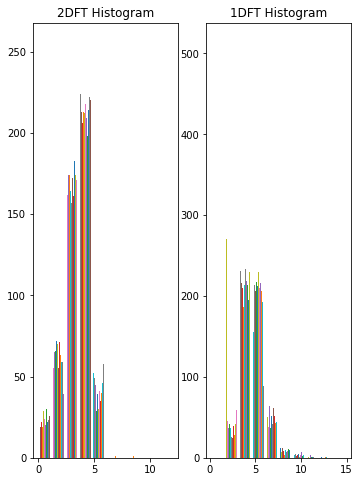

In [18]:
# imap => 2DFT Amplitude Only Image
# imgap => 1DFT Amplitude Only Image
plt.figure(figsize=(15, 8))
plt.subplot(151),plt.hist(imap), plt.title("2DFT Histogram")
plt.subplot(152),plt.hist(imgap), plt.title("1DFT Histogram")

1DCT and 2DCT

In [0]:
def dct1(a):
    return scipy.fftpack.dct( a, axis=0, norm='ortho' )

def idct1(a):
    return scipy.fftpack.idct( a, axis=0, norm='ortho')


def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d18c4240>,
 Text(0.5, 1.0, '8x8 2DCTs of the image'))

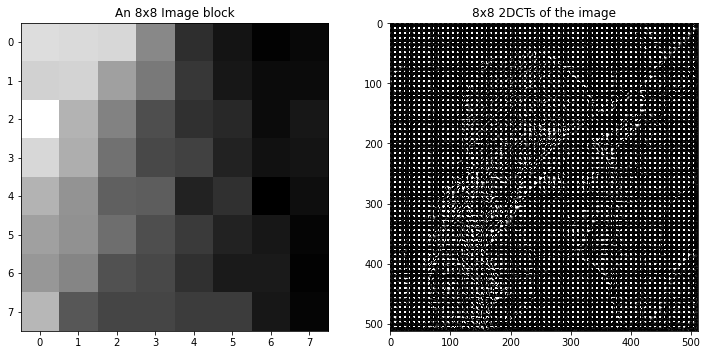

In [20]:
# dct2
imgsize = image.shape
dct = np.zeros(imgsize)
pos = 128

# Do 8x8 DCT on image (in-place)
for i in r_[:imgsize[0]:8]:
    for j in r_[:imgsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( image[i:(i+8),j:(j+8)] )

image_block = image[pos:pos+8,pos:pos+8]
dct_block = dct[pos:pos+8,pos:pos+8]

# show dct block images 
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(image_block, "gray"), plt.title("An 8x8 Image block")
plt.subplot(152), plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0), plt.title("8x8 2DCTs of the image")

In [0]:
imF = dct2(image)
imR = idct2(imF)

In [22]:
# check if the reconstructed image is nearly equal to the original image
np.allclose(image, imR)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7d10af7b8>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'reconstructed image (DCT+IDCT)'))

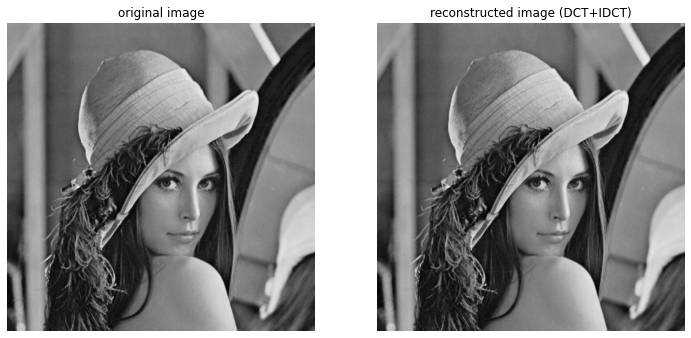

In [23]:
# show images -> 2DCT
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image, 'gray'), plt.axis('off'), plt.title('original image')
plt.subplot(152), plt.imshow(imR, 'gray'), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)')

In [24]:
# Calculate PSNR 2DCT
x,y = image.shape
mse = 0
for i in range(x):
  for j in range(y):
    mse = mse + np.power((imR[i,j] - image[i,j]),2) / (x*y)

PNSR = 20*np.log10(np.amax(image)) - 10*np.log10(mse)
print(PNSR)

314.7945387703195


(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7cfc79ac8>,
 Text(0.5, 1.0, '8x8 1DCTs of the image'))

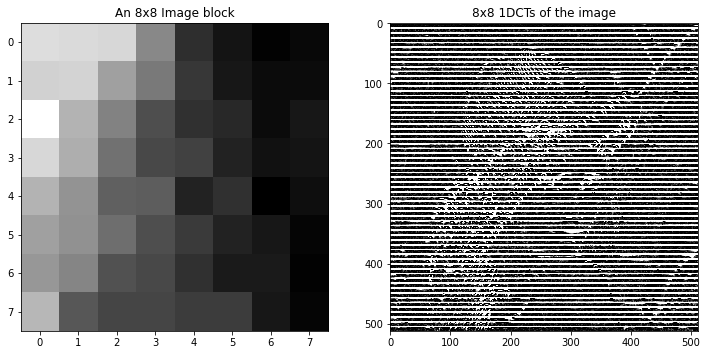

In [25]:
# dct1
imagesize = image.shape
imdct1 = np.zeros(imagesize)
pos = 128

# Do 8x8 DCT on image (in-place)
for i in r_[:imgsize[0]:8]:
    for j in r_[:imgsize[1]:8]:
        imdct1[i:(i+8),j:(j+8)] = dct1( image[i:(i+8),j:(j+8)] )

image_block1 = image[pos:pos+8,pos:pos+8]
dct_block1 = imdct1[pos:pos+8,pos:pos+8]

# show dct block images 
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(image_block1, "gray"), plt.title("An 8x8 Image block")
plt.subplot(152), plt.imshow(imdct1,cmap='gray',vmax = np.max(imdct1)*0.01,vmin = 0), plt.title("8x8 1DCTs of the image")

In [0]:
imF1 = dct1(image)
imR1 = idct1(imF1)

In [27]:
# check if the reconstructed image is nearly equal to the original image
np.allclose(image, imR1)

True

(<matplotlib.axes._subplots.AxesSubplot at 0x7fe7cf9d12b0>,
 (-0.5, 511.5, 511.5, -0.5),
 Text(0.5, 1.0, 'reconstructed image (DCT+IDCT)'))

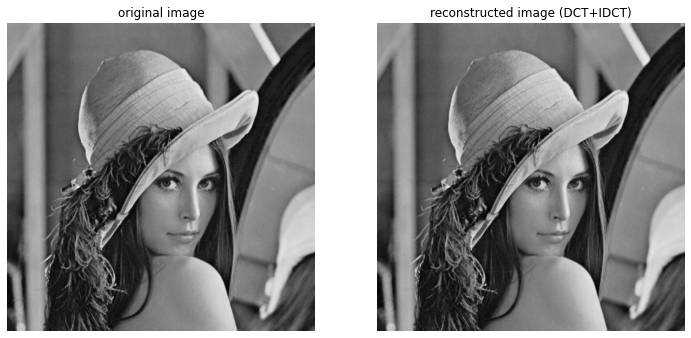

In [28]:
# show images -> 1DCT
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151),plt.imshow(image, 'gray'), plt.axis('off'), plt.title('original image')
plt.subplot(152), plt.imshow(imR1, 'gray'), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)')

In [29]:
# Calculate PSNR 1DCT
x,y = image.shape
MSE = 0
for i in range(x):
  for j in range(y):
    MSE = MSE + np.power((imR1[i,j] - image[i,j]),2) / (x*y)

dct1_psnr = 20*np.log10(np.amax(image)) - 10*np.log10(MSE)
print(dct1_psnr)

320.1697225561623
